 The aim of this analysis is to predict the price of diamonds based on their characteristics. The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 53940 observations and 10 variables. The variables are as follows:

| Column Name |	Description |
|--|--|
|carat|	Weight of the diamond |
|cut |	Quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|	Diamond colour, from J (worst) to D (best)|
|clarity	| How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x	| Length in mm|
|y	|Width in mm|
|z	|Depth in mm|
|depth	|Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table	|Width of top of diamond relative to widest point (43--95)|
|price	|Price in US dollars (326--18,823)|

In [8]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('dataset/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#values count of categorical variables
print(df.cut.value_counts(),'\n\n',df.color.value_counts(),'\n\n',df.clarity.value_counts())

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64 

 G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64 

 SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64


# Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

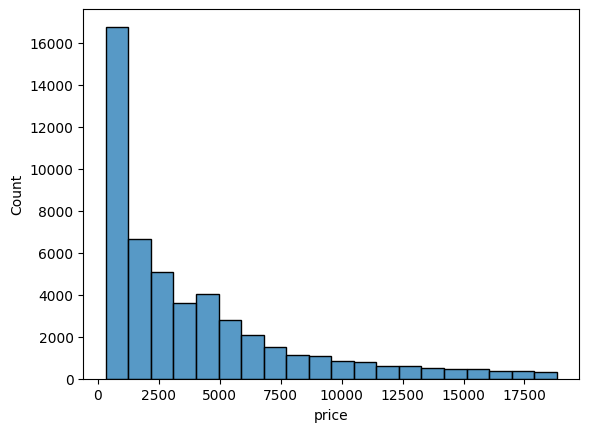

In [9]:
sns.histplot(df['price'],bins = 20)

<AxesSubplot:xlabel='carat', ylabel='Count'>

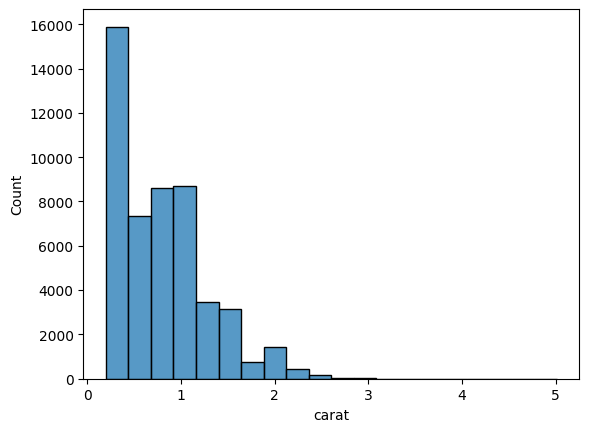

In [10]:
sns.histplot(df['carat'],bins=20)


#### Most of the diamonds are less then 1 carat in weight.

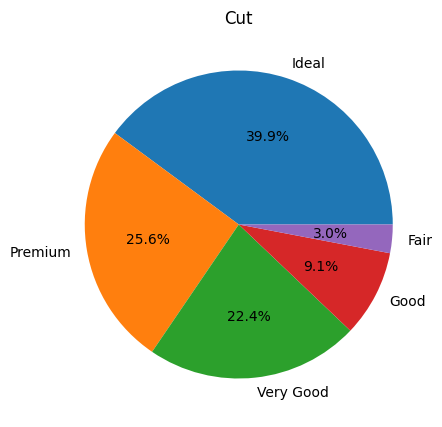

In [11]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

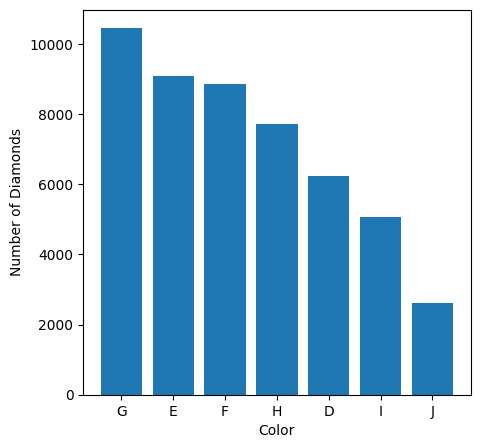

In [14]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

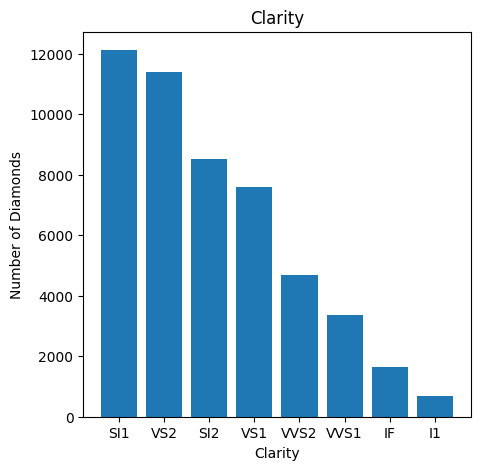

In [15]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

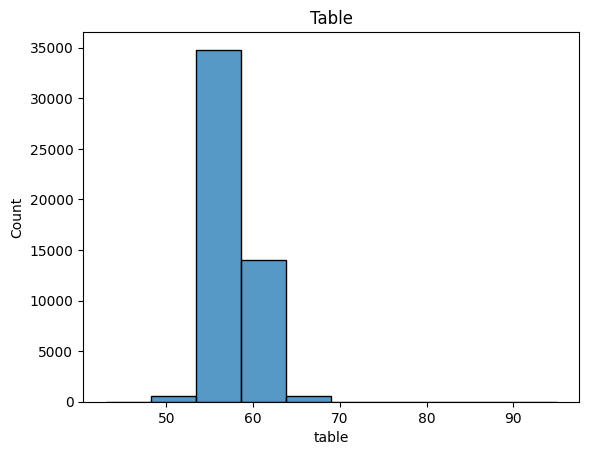

In [16]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

#### Compare diamond's features with price

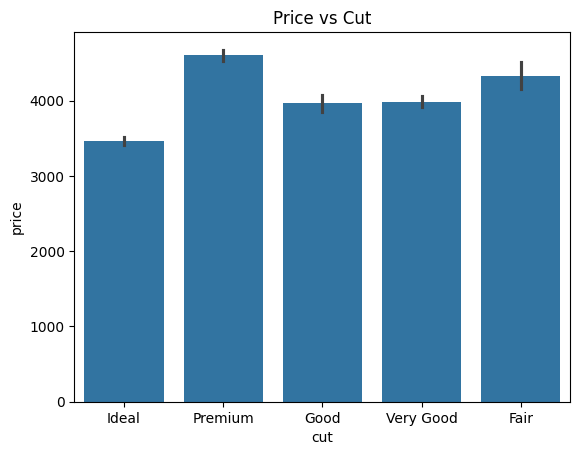

In [21]:
sns.barplot(x='cut',y='price',data=df)
plt.title('Price vs Cut')
plt.show()

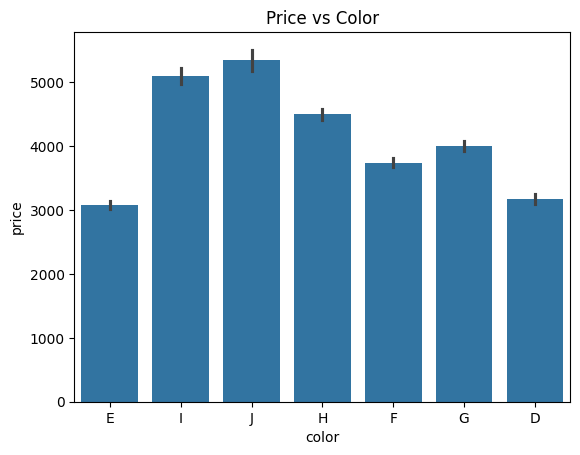

In [20]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

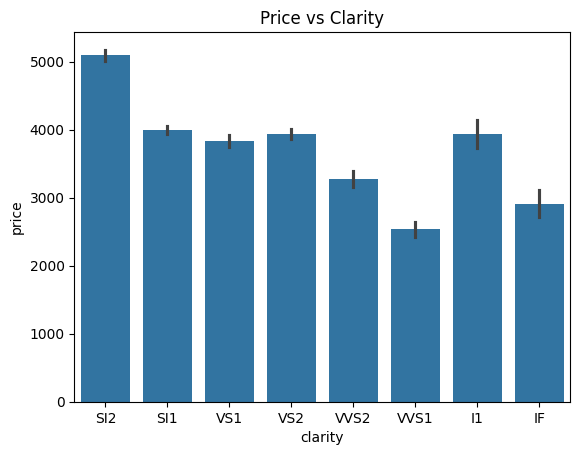

In [22]:
sns.barplot(x = 'clarity', y = 'price', data = df)
plt.title('Price vs Clarity')
plt.show()

J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph versus price, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.

# Data Preprocessing 2

In [24]:
#changing categorical variables to numerical variables
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

#### Correlation Matrix

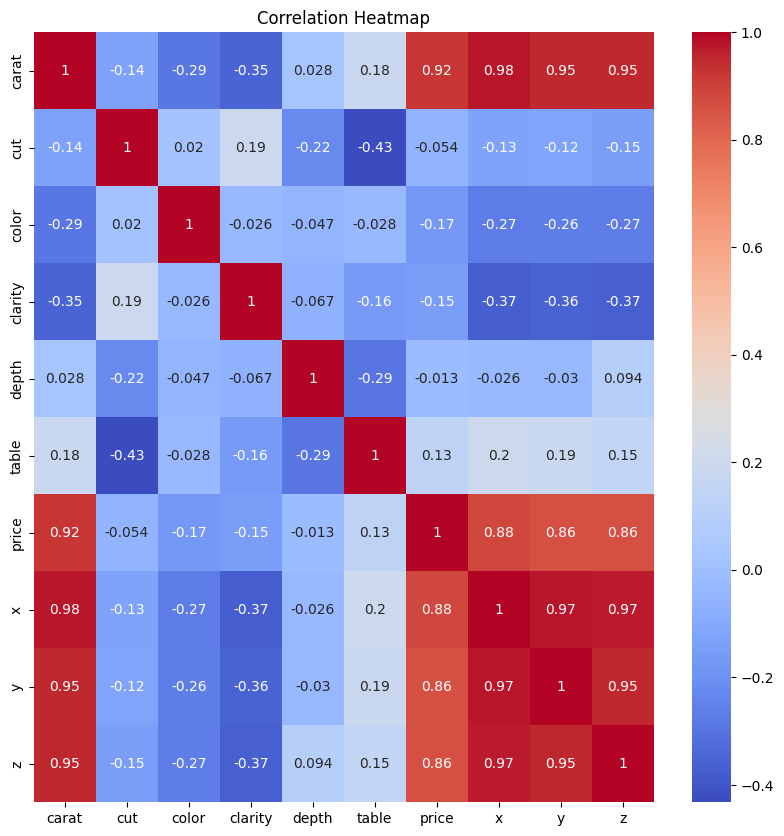

In [26]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df['carat'].head()

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

#### Ploting the relationship between Price and Carat

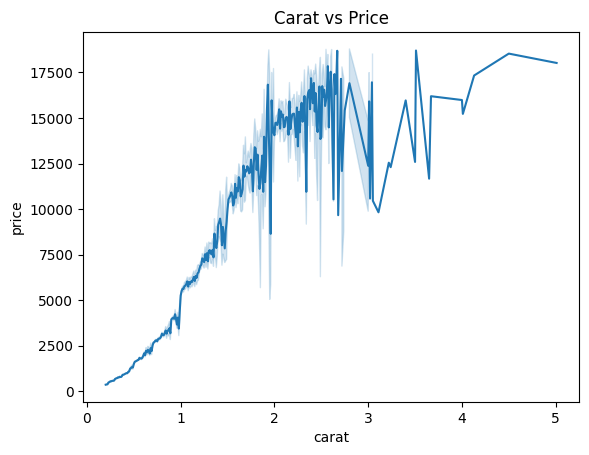

In [27]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

From the lineplot it is quite clear that the price of the diamond increases with the increase in the carat of the diamond. However, diamonds with less carat also have high price. This is because of the other factors that affect the price of the diamond.

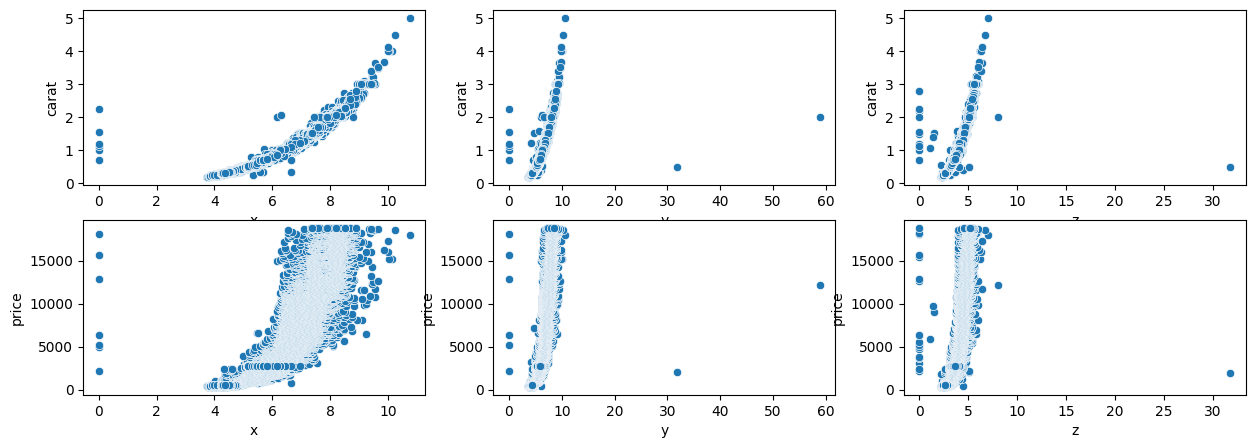

In [30]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

Majority of the diamonds have x values between 4 and 8, y values between 4 and 10 and z values between 2 and 6. Diamonds with other dimensions are very rare.

### Split Train and Test sets

In [31]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

#### Model Building
#### Decision Tree Regressor


In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [33]:
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999995617234543

In [34]:
#predicting the test set
dt_pred = dt.predict(x_test)

#### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [36]:
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9971527637192232

In [37]:
#predicting the test set
rf_pred = rf.predict(x_test)

#### Model Evaluation

##### Evaluation on decision tree regressor

<ipython-input-39-752cc5989f87>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-39-752cc5989f87>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)


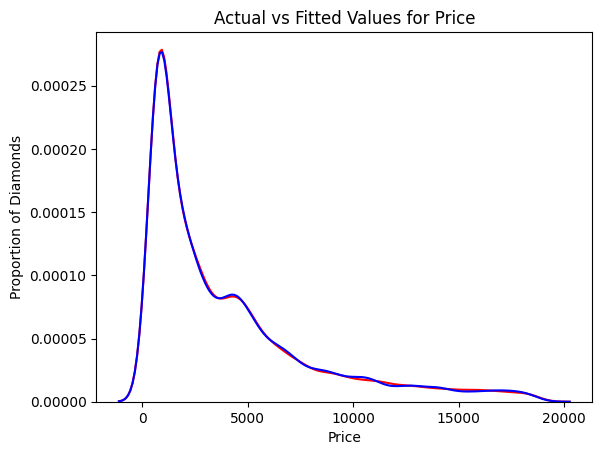

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [40]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 815.2473309562258
Decision Tree Regressor Accuracy: 0.9587542925366473
Decision Tree Regressor MAE: 413.9037625


##### Evaluation on random forest regressor

<ipython-input-41-df59914434b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-41-df59914434b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)


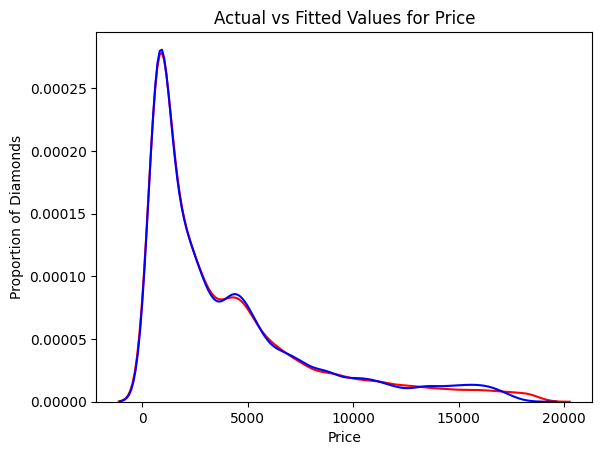

In [41]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [42]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 620.2984379090655
Random Forest Regressor Accuracy: 0.976121812346882
Random Forest Regressor MAE: 306.6323456375


# Conclusion
Both the models have almost same accuracy. However, the Random Forest Regressor model is slightly better than the Decision Tree Regressor model.

There is something interesting about the data. The price of the diamonds with J color and I1 clarity is higher than the price of the diamonds with D color and IF clarity which couldn't be explained by the models. This could be because of the other factors that affect the price of the diamond.